In [1]:
!pip install -q -r requirements.txt

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [ ]:
import os
import chromadb

from dotenv import load_dotenv

from langchain_core.documents import Document
from langchain_community.vectorstores import Chroma
from langchain_openai import AzureOpenAIEmbeddings, AzureChatOpenAI
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_experimental.text_splitter import SemanticChunker
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

from llama_parse import LlamaParse
from llama_index.core import Settings, SimpleDirectoryReader


In [ ]:
from langchain.text_splitter import (
    CharacterTextSplitter,
    RecursiveCharacterTextSplitter
)

In [ ]:
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [48]:
# prompt: unzip Memory papers - short.zip into papers folder
!unzip papers.zip

Archive:  papers.zip
  inflating: Memory papers - short/The role of REM sleep theta in emotional memory.pdf  
  inflating: Memory papers - short/THe restless engram consoli never end.pdf  
  inflating: Memory papers - short/evolution of hippo in relation to neocortex.pdf  
  inflating: Memory papers - short/Unified model of spatial and episodic memory.pdf  
  inflating: Memory papers - short/THe functional and structural neuroanatomy of systems consolidation of autobio and semantic memory.pdf  
  inflating: Memory papers - short/Boosting slow oscillation during sleep to improve memory in old people.pdf  


In [ ]:
# prompt: read config file config_4o.json and read AZURE_OPENAI_KEY into api_key and AZURE_OPENAI_KEY into endpoint

import json

def read_config(config_file):
  """Reads a JSON config file and returns a dictionary."""
  with open(config_file, 'r') as f:
    return json.load(f)

config = read_config('config_4o.json')
api_key = config.get('AZURE_OPENAI_KEY')
endpoint = config.get('AZURE_OPENAI_ENDPOINT')
emb_key = config.get('EMB_MODEL_KEY')
emb_endpoint = config.get('EMB_DEPLOYMENT')
llamaparse_api_key = config.get('LLAMA_KEY')

In [ ]:
embedding_function = chromadb.utils.embedding_functions.OpenAIEmbeddingFunction(
    api_base=emb_endpoint,
    api_key=emb_key,
    api_type='azure',
    api_version='2024-02-01',
    model_name='text-embedding-ada-002'
)

In [ ]:
embedding_model = AzureOpenAIEmbeddings(
    azure_endpoint=emb_endpoint,
    api_key=emb_key,
    api_version='2024-02-01',
    model='text-embedding-ada-002'
)

In [ ]:
llm = AzureChatOpenAI(
    azure_endpoint=endpoint,
    api_key=api_key,
    api_version='2024-02-01',
    azure_deployment='gpt-4o',
    temperature=0
)

In [ ]:
Settings.llm = llm
Settings.embedding = embedding_model

### llama parse

In [ ]:
# llama-parse is async-first, running the async code in a notebook requires the use of nest_asyncio
import nest_asyncio

nest_asyncio.apply()

In [ ]:
parser = LlamaParse(
    result_type="markdown",
    skip_diagonal_text=True,
    fast_mode=False,
    num_workers=9,
    check_interval=10,
    api_key=llamaparse_api_key
)

In [50]:
json_objs = parser.get_json_result("papers/THe functional and structural neuroanatomy of systems consolidation of autobio and semantic memory.pdf")
json_list = json_objs[0]["pages"]

Started parsing the file under job_id 74d8a123-17c6-4738-a82a-83346f6821a2


In [51]:
json_list[0]

{'page': 1,
 'text': 'The Functional and Structural\nNeuroanatomy of Systems Consolidation\nfor Autobiographical and Semantic\nMemory\n\nAdam J.O. Dede and Christine N. Smith\n\nAbstract                             It is well established that patients with memory impairment have more\ndifficulty retrieving memories from the recent past relative to the remote past and\nthat damage to the medial temporal lobe (MTL) plays a key role in this pattern of\nimpairment. The precise role of the MTL and how it may interact with other brain\nregions remains an area of active research. We investigated the role of structures in\na memory network that supports remembering. Our chapter focuses on two types of\nmemory: episodic memory and semantic memory. Findings from studies of patients\nwith brain damage and neuroimaging studies in patients and healthy individuals\nwere considered together to identify the functional and structural neuroanatomy of\npast remembrance.\n\nKeywords\n         Connectivity

In [53]:
image_dicts = parser.get_images(
    json_objs,
    download_path="images3"
)

> Image for page 1: [{'name': 'img_p0_1.png', 'height': 26, 'width': 318, 'x': 53.8580017, 'y': 626.45699958, 'original_width': 1100, 'original_height': 90, 'path': 'images2/74d8a123-17c6-4738-a82a-83346f6821a2-img_p0_1.png', 'job_id': '74d8a123-17c6-4738-a82a-83346f6821a2', 'original_file_path': 'papers/THe functional and structural neuroanatomy of systems consolidation of autobio and semantic memory.pdf', 'page_number': 1}]
> Image for page 2: []
> Image for page 3: []
> Image for page 4: []
> Image for page 5: []
> Image for page 6: []
> Image for page 7: []
> Image for page 8: [{'name': 'img_p7_1.png', 'height': 278, 'width': 784, 'x': 56.67499922, 'y': 373.3239992200001, 'original_width': 680, 'original_height': 241, 'path': 'images2/74d8a123-17c6-4738-a82a-83346f6821a2-img_p7_1.png', 'job_id': '74d8a123-17c6-4738-a82a-83346f6821a2', 'original_file_path': 'papers/THe functional and structural neuroanatomy of systems consolidation of autobio and semantic memory.pdf', 'page_number':

In [56]:
image_dicts

[{'name': 'img_p0_1.png',
  'height': 26,
  'width': 318,
  'x': 53.8580017,
  'y': 626.45699958,
  'original_width': 1100,
  'original_height': 90,
  'path': 'images3/74d8a123-17c6-4738-a82a-83346f6821a2-img_p0_1.png',
  'job_id': '74d8a123-17c6-4738-a82a-83346f6821a2',
  'original_file_path': 'papers/THe functional and structural neuroanatomy of systems consolidation of autobio and semantic memory.pdf',
  'page_number': 1},
 {'name': 'img_p7_1.png',
  'height': 278,
  'width': 784,
  'x': 56.67499922,
  'y': 373.3239992200001,
  'original_width': 680,
  'original_height': 241,
  'path': 'images3/74d8a123-17c6-4738-a82a-83346f6821a2-img_p7_1.png',
  'job_id': '74d8a123-17c6-4738-a82a-83346f6821a2',
  'original_file_path': 'papers/THe functional and structural neuroanatomy of systems consolidation of autobio and semantic memory.pdf',
  'page_number': 8},
 {'name': 'img_p18_1.png',
  'height': 278,
  'width': 784,
  'x': 56.67499922,
  'y': 378.87399466000005,
  'original_width': 680,
 

Error loading 74d8a123-17c6-4738-a82a-83346f6821a2-img_p0_1.png: too many indices for array: array is 1-dimensional, but 2 were indexed
Error loading 74d8a123-17c6-4738-a82a-83346f6821a2-img_p7_1.png: too many indices for array: array is 1-dimensional, but 2 were indexed
Error loading 74d8a123-17c6-4738-a82a-83346f6821a2-img_p18_1.png: too many indices for array: array is 1-dimensional, but 2 were indexed


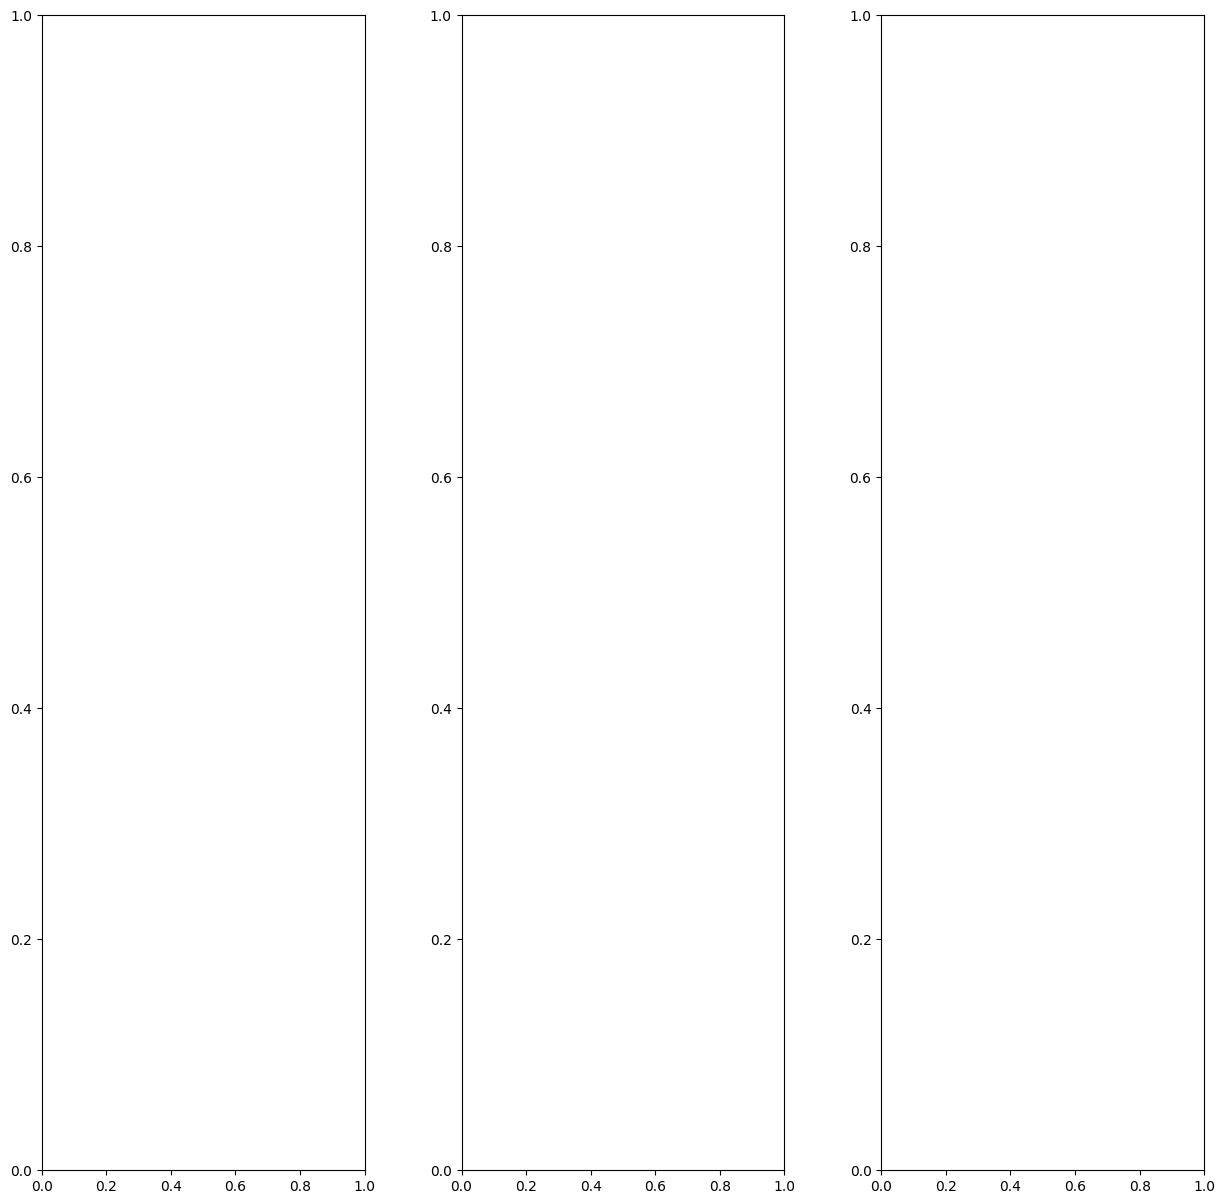

In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import numpy as np

def plot_images_grid(image_folder):
    """Plots images from a folder in a grid format with smaller size."""

    # Filter for valid image files
    valid_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(valid_extensions) and os.path.isfile(os.path.join(image_folder, f))]

    num_images = len(image_files)
    grid_size = (num_images // 8 + 1, 8) if num_images > 8 else (1, num_images)
    fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(15, 15))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, image_file in enumerate(image_files):
        if i >= grid_size[0] * grid_size[1]:
            break

        image_path = os.path.join(image_folder, image_file)
        try:
            # Verify the image format and resize
            with Image.open(image_path) as img:
                img.verify()  # Verify that it is, in fact, an image
                img = Image.open(image_path)  # Resize image to 150x150 pixels
                img = np.array(img)
                row = i // grid_size[1]
                col = i % grid_size[1]
                axs[row, col].imshow(img)
                axs[row, col].axis('off')
        except Exception as e:
            print(f"Error loading {image_file}: {e}")

    # Hide any unused subplots
    for j in range(i + 1, grid_size[0] * grid_size[1]):
        row = j // grid_size[1]
        col = j % grid_size[1]
        axs[row, col].axis('off')

    plt.show()


plot_images_grid('images3')

In [ ]:
json_objs =[]
json_list = []
image_dicts = []
for pdf in os.listdir("LLM_papers"):
  if pdf.endswith(".pdf"):
    parser = LlamaParse(verbose=True)
    json_objs.extend(parser.get_json_result(pdf))
    json_list.extend(json_objs[0]["pages"])
    image_dicts.extend(parser.get_images(
    json_objs,
    download_path="images"
    ))

In [ ]:
file_extractor = {".pdf": parser}
documents = SimpleDirectoryReader("LLM_papers", file_extractor=file_extractor).load_data()

Started parsing the file under job_id e4a03116-400d-4157-a1c8-10a245b511ce
Started parsing the file under job_id 4050a6ee-9b71-41e9-b4f3-02513f782ced
Started parsing the file under job_id df2323de-fc17-479b-9741-f339b071bae9
Started parsing the file under job_id 6e989bc0-7488-4796-82b4-33672f496920
Started parsing the file under job_id a366c1e5-2515-40a6-b1f0-f4e64baf9595


In [57]:
documents[0]

Document(id_='http://paulgraham.com/worked.html', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='![](https://s.turbifycdn.com/aah/paulgraham/essays-5.gif)|\n![](https://sep.turbifycdn.com/ca/Img/trans_1x1.gif)|\n[![](https://s.turbifycdn.com/aah/paulgraham/essays-6.gif)](index.html)  \n  \n| ![What I Worked On](https://s.turbifycdn.com/aah/paulgraham/what-i-worked-\non-4.gif)  \n  \nFebruary 2021  \n  \nBefore college the two main things I worked on, outside of school, were\nwriting and programming. I didn\'t write essays. I wrote what beginning writers\nwere supposed to write then, and probably still are: short stories. My stories\nwere awful. They had hardly any plot, just characters with strong feelings,\nwhich I imagined made them deep.  \n  \nThe first programs I tried writing were on the IBM 1401 that our school\ndistrict used for what was then called "data processing." This was in 9th\ngrade, so I was 13 or 14

In [ ]:
# prompt: save documents to a pickle file

import pickle

# Assuming 'documents' is the variable containing your list of Document objects
with open('documents.pkl', 'wb') as f:
  pickle.dump(documents, f)

In [ ]:
documents[0].metadata

{'file_path': '/content/LLM_papers/LongFormer - Long  document transformer.pdf',
 'file_name': 'LongFormer - Long  document transformer.pdf',
 'file_type': 'application/pdf',
 'file_size': 539211,
 'creation_date': '2024-10-23',
 'last_modified_date': '2024-10-22'}

In [ ]:
documents[0]

Document(id_='ada9b534-8c6b-4a14-a307-584945e834e2', embedding=None, metadata={'file_path': '/content/LLM_papers/LongFormer - Long  document transformer.pdf', 'file_name': 'LongFormer - Long  document transformer.pdf', 'file_type': 'application/pdf', 'file_size': 539211, 'creation_date': '2024-10-23', 'last_modified_date': '2024-10-22'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='# Longformer: The Long-Document Transformer\n\nIz Beltagy∗ Matthew E. Peters∗ Arman Cohan∗\n\nAllen Institute for Artificial Intelligence, Seattle, WA, USA\n\n{beltagy,matthewp,armanc}@allenai.org\n\n# Abstract\n\nTransformer-based models are unable to process long sequences due to their self-attention operation, which scales quadratically with the sequence length. To addre

In [ ]:
from copy import deepcopy
from llama_index.core.schema import TextNode
from llama_index.core import VectorStoreIndex


def get_page_nodes(docs, separator="\n---\n"):
    """Split each document into page node, by separator."""
    nodes = []
    for doc in docs:
        doc_chunks = doc.text.split(separator)
        for doc_chunk in doc_chunks:
            node = TextNode(
                text=doc_chunk,
                metadata=deepcopy(doc.metadata),
            )
            nodes.append(node)

    return nodes

In [ ]:
image_dicts = parser.get_images(
    documents[0].text,
    download_path="dellxps_images"
)

Error while downloading images from the parsed result: string indices must be integers


#### Web page loading

In [45]:
from llama_index.core import SummaryIndex
from llama_index.readers.web import SimpleWebPageReader
from IPython.display import Markdown, display
import os

In [58]:
documents = SimpleWebPageReader(html_to_text=True).load_data(
    ["https://en.wikipedia.org/wiki/Large_language_model"]
)

In [59]:
documents

[Document(id_='https://en.wikipedia.org/wiki/Large_language_model', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Jump to content\n\nMain menu\n\nMain menu\n\nmove to sidebar hide\n\nNavigation\n\n  * [Main page](/wiki/Main_Page "Visit the main page \\[z\\]")\n  * [Contents](/wiki/Wikipedia:Contents "Guides to browsing Wikipedia")\n  * [Current events](/wiki/Portal:Current_events "Articles related to current events")\n  * [Random article](/wiki/Special:Random "Visit a randomly selected article \\[x\\]")\n  * [About Wikipedia](/wiki/Wikipedia:About "Learn about Wikipedia and how it works")\n  * [Contact us](//en.wikipedia.org/wiki/Wikipedia:Contact_us "How to contact Wikipedia")\n\nContribute\n\n  * [Help](/wiki/Help:Contents "Guidance on how to use and edit Wikipedia")\n  * [Learn to edit](/wiki/Help:Introduction "Learn how to edit Wikipedia")\n  * [Community portal](/wiki/Wikipedia:Community_portal "The hub for edi

In [42]:
import requests

def get_html_content(url):
    """Fetches the HTML content of the given URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

In [43]:
url = 'https://jalammar.github.io/illustrated-transformer/'
html_content = get_html_content(url)
if html_content:
    print(html_content)

<!DOCTYPE html>
<html>
  <head>
    <title>The Illustrated Transformer – Jay Alammar – Visualizing machine learning one concept at a time.</title>

        <meta charset="utf-8" />
    <meta content='text/html; charset=utf-8' http-equiv='Content-Type'>
    <meta http-equiv='X-UA-Compatible' content='IE=edge'>
    <meta name='viewport' content='width=device-width, initial-scale=1.0, maximum-scale=1.0'>

    
    <meta name="description" content="Discussions:
Hacker News (65 points, 4 comments), Reddit r/MachineLearning (29 points, 3 comments)


Translations: Arabic, Chinese (Simplified) 1, Chinese (Simplified) 2, French 1, French 2, Italian, Japanese, Korean, Persian, Russian, Spanish 1, Spanish 2, Vietnamese

Watch: MIT’s Deep Learning State of the Art lecture referencing this post

Featured in courses at Stanford, Harvard, MIT, Princeton, CMU and others

In the previous post, we looked at Attention – a ubiquitous method in modern deep learning models. Attention is a concept that helpe

#### PDF Parse

In [ ]:
chromadb_client = chromadb.EphemeralClient()

In [ ]:
pdf_folder_location = "papers"

In [ ]:
pdf_loader = PyPDFDirectoryLoader(pdf_folder_location)

In [ ]:
character_text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512,
    chunk_overlap=16,
    separator=''
)

report_chunks = pdf_loader.load_and_split(character_text_splitter)

In [ ]:
report_chunks[0]

Document(metadata={'source': 'papers/Unified model of spatial and episodic memory.pdf', 'page': 0}, page_content='Received 20 December 2001\nAccepted 11 March 2002\nPublishedonline 9 May 2002\nA uniﬁed model of spatial and episodic memory\nEdmund T. Rolls*, Simon M. Stringer and Thomas P. Trappenberg\nDepartmentofExperimentalPsychology,UniversityofOxford,SouthParksRoad,OxfordOX13UD,UK\nMedial temporal lobe structures including the hippocampus are implicated by separate investigations in\nboth episodic memory and spatial function. We show that a single recurrent attractor network can store\nboth the discrete memories that char')

In [ ]:
len(report_chunks)

590

In [ ]:
chunks = [Document(id=i, page_content = d.page_content, metadata = d.metadata) for i, d in zip(range(len(report_chunks)),report_chunks)]

In [ ]:
vectorstore = Chroma.from_documents(
    chunks,
    embedding_model,
    collection_name="full_document_chunks",
    persist_directory='./reports_db'
)

In [ ]:
metadata_field_info = [
    AttributeInfo(
        name="Source",
        description="Name of the research paper",
        type="string"
    ),
    AttributeInfo(
        name="page",
        description="page within the research paper that the document belongs to",
        type="integer"
    )
]


In [ ]:

document_content_description = "information mentioned in the research paper"


In [ ]:
structured_retriever = SelfQueryRetriever.from_llm(
    llm,
    vectorstore,
    document_content_description,
    metadata_field_info
)


In [ ]:
user_input = "what are the parts involved in memory?"

In [ ]:
structured_retriever.invoke(user_input)


[Document(metadata={'page': 0, 'source': 'papers/Unified model of spatial and episodic memory.pdf'}, page_content='hippocampus\n1. INTRODUCTION\nEvidence implicating the hippocampus and connected\nstructures in the medial temporal lobe in episodic memory\nis that in humans with bilateral damage to this region ante-\nrograde amnesia is produced, with the memory for parti-\ncular events and episodes being particularly impaired\n(Squire 1992; Rempel-Clower et al. 1996). We use the\nterm episodic memory to capture the memory of a single\nevent that might occur when a previous particular\noccasion is recalled. The event (something th'),
 Document(metadata={'page': 1, 'source': 'papers/The role of REM sleep theta in emotional memory.pdf'}, page_content='chances of survival ( Hamann ,2001). The neural mechanism\nunderlying the influence of emotion on long-term memory\nretention involves co-activation of the hippocampus and the\namygdala—the emotional center of the brain. The amygdala\nappears

In [ ]:
docs = vectorstore.similarity_search(user_input, k=5)

In [ ]:
for i in docs:
  print("source", i.metadata['source'])
  print("page", i.metadata['page'],"\n")
  print(i.page_content)


source papers/Unified model of spatial and episodic memory.pdf
page 0 

hippocampus
1. INTRODUCTION
Evidence implicating the hippocampus and connected
structures in the medial temporal lobe in episodic memory
is that in humans with bilateral damage to this region ante-
rograde amnesia is produced, with the memory for parti-
cular events and episodes being particularly impaired
(Squire 1992; Rempel-Clower et al. 1996). We use the
term episodic memory to capture the memory of a single
event that might occur when a previous particular
occasion is recalled. The event (something th
source papers/Unified model of spatial and episodic memory.pdf
page 0 

nt (something that happens
at a particular time) might include both spatial and non-
spatial components, including for example where the
event occurred, who was present, and which objects were
seen. (We use the term episodic memory to refer to the
memory of a particular event, and are not concerned in
this paper with describing linked tempora

## Semantic Chunking


In [ ]:
# Semantic chunking

semantic_text_splitter = SemanticChunker(
    embedding_model,
    breakpoint_threshold_type='gradient'
)

semantic_chunks = pdf_loader.load_and_split(semantic_text_splitter)

In [ ]:
semantic_chunks[2]

Document(metadata={'source': 'papers/Unified model of spatial and episodic memory.pdf', 'page': 0}, page_content='spatial) and inherently separate (e.g. different objects). This approach uniﬁes the spatial and episodic approaches\nto medial temporal lobe function, showing that both types\nof representation must be stored in the same network if\nassociations between them are to be learned and retrieved. Previous models of hippocampal function have focused\nprimarily on networks that can store discrete patterns suit-\nable for episodic memory (Marr 1971; Treves & Rolls\n1992, 1994; McClelland et al. 1995; Rolls 1996), or on\ncontinuous patterns suitable for spatial memory\n(Samsonovich & McNaughton 1997; Redish & Touretzky')

In [ ]:
len(semantic_chunks)

272

In [ ]:
semantic_chunks = [Document(id=i, page_content = d.page_content, metadata = d.metadata) for i, d in zip(range(len(semantic_chunks)),semantic_chunks)]

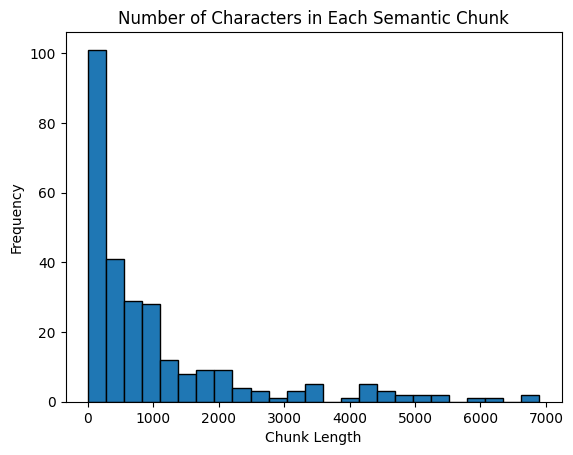

In [ ]:
# prompt: plot a graph of number of characters in each chunk of semantic_chunks

import matplotlib.pyplot as plt

# Assuming 'semantic_chunks' is defined from the previous code
chunk_lengths = [len(chunk.page_content) for chunk in semantic_chunks]

plt.hist(chunk_lengths,bins = 25, edgecolor = 'black')
plt.xlabel('Chunk Length')
plt.ylabel('Frequency')
plt.title('Number of Characters in Each Semantic Chunk')
plt.show()

In [ ]:
semanticstore = Chroma.from_documents(
    semantic_chunks,
    embedding_model,
    collection_name="semantic_chunks",
    persist_directory='./reports_db')


In [ ]:
structured_retriever = SelfQueryRetriever.from_llm(
    llm,
    semanticstore,
    document_content_description,
    metadata_field_info
)


In [ ]:
structured_retriever.invoke(user_input)

[Document(metadata={'page': 10, 'source': 'papers/The role of REM sleep theta in emotional memory.pdf'}, page_content='545, 307–311. doi: 10.1016/0006-\n8993(91)91303-I\nDolcos, F., LaBar, K. S., and Cabeza, R. (2004). Interaction between the amygdala\nand the medial temporal lobe memory system predicts better memory\nfor emotional events. Neuron 42, 855–863. doi: 10.1016/S0896-6273(04)\n00289-2\nDragoi, G., and Buzsáki, G. (2006). Temporal encoding of place\nsequences by hippocampal cell assemblies. Neuron 50, 145–157. doi:\n10.1016/j.neuron.2006.02.023\nDragoi, G., Carpi, D., Recce, M., Csicsvari, J., and Buzsaki, G. (1999). Interactions\nbetween hippocampus and medial septum during sharp waves and theta\noscillation in the behaving rat. J. Neurosci. 19, 6191–6199. Dragoi, G., and Tonegawa, S. (2011). Preplay of future place cell sequences\nby hippocampal cellular assemblies. Nature 469, 397–401. doi:\n10.1038/nature09633\nEgo-Stengel, V., and Wilson, M. A. (2010). Disruption of ripp

In [ ]:
# Hypothetical Questions

hypothetical_questions_prompt = """
Generate a list of exactly 3 hypothetical questions that the below document could be used to answer:
{doc}
Generate only a list of questions. Do not mention anything before or after the list.
"""


In [ ]:

hypothetical_question_documents = []


In [ ]:

for document in semantic_chunks:

    try:
        response = llm.invoke(hypothetical_questions_prompt.format(doc=document))

        questions = response.content
    except Exception as e:
        print(e)
        questions = ""

    questions_metadata = {
        'parent_chunk_id': document.id,
        'parent_collection': 'full_document_chunks'
    }

    hypothetical_question_documents.append(
        Document(
            id=document.id,
            page_content=questions,
            metadata=questions_metadata
        )
    )


In [ ]:
collection = chromadb_client.get_or_create_collection(
    name='hypothetical_questions',
    metadata={"hnsw:space": "cosine"},
    embedding_function=embedding_function
)

In [ ]:
# for i,d in zip(range(len(hypothetical_question_documents)), hypothetical_question_documents):

#   d.metadata['parent_chunk_id'] = str(i)
#   d.id = str(i)

In [ ]:
collection.add(
    ids=[d.id for d in hypothetical_question_documents],
    documents=[d.page_content for d in hypothetical_question_documents],
    metadatas=[d.metadata for d in hypothetical_question_documents]
)

In [ ]:
# Retriever over questions

hypstore = Chroma(
    client=chromadb_client,
    collection_name="hypothetical_questions",
    embedding_function=embedding_model
)

In [ ]:
hypo_retriever = hypstore.as_retriever(
    search_type="similarity",
    search_kwargs={'k': 5}
)


In [ ]:
hypothetical_questions_retrieved = hypo_retriever.invoke(user_input)

In [ ]:
hypothetical_questions_retrieved

[Document(metadata={'parent_chunk_id': 92, 'parent_collection': 'full_document_chunks'}, page_content='1. How does the interaction between the amygdala and the medial temporal lobe memory system influence memory for emotional events?\n2. What are the effects of disrupting ripple-associated hippocampal activity during rest on spatial learning in rats?\n3. How do learning-dependent changes in sleep spindles and Stage 2 sleep relate to memory consolidation?'),
 Document(metadata={'parent_chunk_id': 137, 'parent_collection': 'full_document_chunks'}, page_content='1. How do the amygdala and hippocampus interact to encode emotional memories?\n2. What is the relationship between sleep stages and the consolidation of declarative memories?\n3. How does REM sleep deprivation affect avoidance learning and brain acetylcholine levels in mice?'),
 Document(metadata={'parent_chunk_id': 119, 'parent_collection': 'full_document_chunks'}, page_content='1. How does the amygdala influence the consolidatio

In [ ]:
# Query Expansion

query_expansion_prompt = """
You are an neuroscience domain expert assisting in answering questions related to research papers.
Perform query expansion on the question received. If there are multiple common ways of phrasing a user question \
or common synonyms for key words in the question, make sure to return multiple versions \
of the query with the different phrasings.

If there are acronyms or words you are not familiar with, do not try to rephrase them.

Return at least 3 versions of the question as a list.
Generate only a list of questions. Do not mention anything before or after the list.

Question:
{question}
"""

In [ ]:
query_expansions = llm.invoke(query_expansion_prompt.format(question=user_input))

In [ ]:
query_expansions_list = query_expansions.content.split("\n")


In [ ]:
query_expansions_list

['- What are the brain regions involved in memory?',
 '- Which areas of the brain are responsible for memory?',
 '- What brain structures are associated with memory?']

In [ ]:
hypo_retriever.invoke(user_input)

[Document(metadata={'parent_chunk_id': 92, 'parent_collection': 'full_document_chunks'}, page_content='1. How does the interaction between the amygdala and the medial temporal lobe memory system influence memory for emotional events?\n2. What are the effects of disrupting ripple-associated hippocampal activity during rest on spatial learning in rats?\n3. How do learning-dependent changes in sleep spindles and Stage 2 sleep relate to memory consolidation?'),
 Document(metadata={'parent_chunk_id': 137, 'parent_collection': 'full_document_chunks'}, page_content='1. How do the amygdala and hippocampus interact to encode emotional memories?\n2. What is the relationship between sleep stages and the consolidation of declarative memories?\n3. How does REM sleep deprivation affect avoidance learning and brain acetylcholine levels in mice?'),
 Document(metadata={'parent_chunk_id': 119, 'parent_collection': 'full_document_chunks'}, page_content='1. How does the amygdala influence the consolidatio

In [ ]:
context_list = []

In [ ]:
for query in query_expansions_list:
    print(query)
    context_list.extend([str(d.metadata) + d.page_content for d in hypo_retriever.invoke(query)])
    print(hypo_retriever.invoke(query))
    print("\n")



- What are the brain regions involved in memory?
[Document(metadata={'parent_chunk_id': 137, 'parent_collection': 'full_document_chunks'}, page_content='1. How do the amygdala and hippocampus interact to encode emotional memories?\n2. What is the relationship between sleep stages and the consolidation of declarative memories?\n3. How does REM sleep deprivation affect avoidance learning and brain acetylcholine levels in mice?'), Document(metadata={'parent_chunk_id': 42, 'parent_collection': 'full_document_chunks'}, page_content='1. How does the interaction between the amygdala and hippocampus influence the recall of emotional memories?\n2. What findings did Dolcos et al. (2004) present regarding the neural mechanisms of emotional memory recall?\n3. What role does event-related fMRI play in studying the interaction between the amygdala and hippocampus in emotional memory?'), Document(metadata={'parent_chunk_id': 92, 'parent_collection': 'full_document_chunks'}, page_content='1. How does 

In [ ]:
context_list

["{'parent_chunk_id': 137, 'parent_collection': 'full_document_chunks'}1. How do the amygdala and hippocampus interact to encode emotional memories?\n2. What is the relationship between sleep stages and the consolidation of declarative memories?\n3. How does REM sleep deprivation affect avoidance learning and brain acetylcholine levels in mice?",
 "{'parent_chunk_id': 42, 'parent_collection': 'full_document_chunks'}1. How does the interaction between the amygdala and hippocampus influence the recall of emotional memories?\n2. What findings did Dolcos et al. (2004) present regarding the neural mechanisms of emotional memory recall?\n3. What role does event-related fMRI play in studying the interaction between the amygdala and hippocampus in emotional memory?",
 "{'parent_chunk_id': 92, 'parent_collection': 'full_document_chunks'}1. How does the interaction between the amygdala and the medial temporal lobe memory system influence memory for emotional events?\n2. What are the effects of d

## Compression


In [ ]:
normal_context = structured_retriever.invoke(user_input)

In [ ]:
print(normal_context)

In [ ]:
compressor = LLMChainExtractor.from_llm(llm)

In [ ]:
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=structured_retriever
)

In [ ]:
compressed_docs = compression_retriever.invoke(user_input)

In [ ]:
for compressed_doc in compressed_docs:
    print(compressed_doc.page_content)

Interaction between the amygdala and the medial temporal lobe memory system predicts better memory for emotional events. Neuron 42, 855–863. doi: 10.1016/S0896-6273(04) 00289-2

Dragoi, G., and Buzsáki, G. (2006). Temporal encoding of place sequences by hippocampal cell assemblies. Neuron 50, 145–157. doi: 10.1016/j.neuron.2006.02.023

Dragoi, G., Carpi, D., Recce, M., Csicsvari, J., and Buzsaki, G. (1999). Interactions between hippocampus and medial septum during sharp waves and theta oscillation in the behaving rat. J. Neurosci. 19, 6191–6199. 

Ego-Stengel, V., and Wilson, M. A. (2010). Disruption of ripple-associated hippocampal activity during rest impairs spatial learning in the rat. Hippocampus 20, 1–10. doi: 10.1002/hipo.20707

Ekstrom,A.D.,Caplan,J.B.,Ho,E.,Shattuck,K.,Fried,I.,andKahana,M.J.(2005). Human hippocampal theta activity during virtual navigation. Hippocampus 15, 881–889. doi: 10.1002/hipo.20109
Encoding of emotional memories depends on amygdala and hippocampus and 

## Reranking

In [ ]:
# Reranking

context_query_pairs_for_scoring = [[user_input, doc_text.page_content] for doc_text in normal_context]

In [ ]:
crossencoder = HuggingFaceCrossEncoder(model_name="cross-encoder/ms-marco-MiniLM-L-6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
crossencoder.score(context_query_pairs_for_scoring)

array([-4.842785 , -5.8221684, -5.3490076, -3.1788046], dtype=float32)

In [ ]:
reranker = CrossEncoderReranker(model=crossencoder, top_n=5)

In [ ]:
reranker_retriever = ContextualCompressionRetriever(
    base_compressor=reranker, base_retriever=structured_retriever
)

In [ ]:
reranked_docs = reranker_retriever.invoke(user_input)

In [ ]:
for i in range(len(reranked_docs)):
    if reranked_docs[i].page_content == context_list[i]:
        continue
    else:
        print(f"Document at rank: {i} after reranking differs from the original order")

Document at rank: 0 after reranking differs from the original order
Document at rank: 1 after reranking differs from the original order
Document at rank: 2 after reranking differs from the original order
Document at rank: 3 after reranking differs from the original order


In [ ]:
reranked_docs

[Document(metadata={'page': 1, 'source': 'papers/evolution of hippo in relation to neocortex.pdf'}, page_content='Though seemingly disparate cognitive processes, \nnavigation and episodic memory are both thought to rely \non similar mental representations [Buzsáki and Moser, \n2013; Ekstrom and Ranganath, 2018; Rolls and Wirth, \n2018] and a core neural substrate located in the hippo-\ncampal formation (HF) [Burgess et al., 2002; Buzsáki, \n2005; Horner et al., 2016].'),
 Document(metadata={'page': 10, 'source': 'papers/The role of REM sleep theta in emotional memory.pdf'}, page_content='545, 307–311. doi: 10.1016/0006-\n8993(91)91303-I\nDolcos, F., LaBar, K. S., and Cabeza, R. (2004). Interaction between the amygdala\nand the medial temporal lobe memory system predicts better memory\nfor emotional events. Neuron 42, 855–863. doi: 10.1016/S0896-6273(04)\n00289-2\nDragoi, G., and Buzsáki, G. (2006). Temporal encoding of place\nsequences by hippocampal cell assemblies. Neuron 50, 145–157